# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

https://github.com/difon/DS_Proyecto_03_NLP

In [1]:
# importo librerías 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

#import gc


In [2]:
# importo el dataset train

dataset = pd.read_json('dataset_es_train.json', lines=True) 
dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


---

#### Parte A - Exploración de Datos

<br /> 

In [3]:
shape_dataset = dataset.shape

print(f'\nEl dataset tiene {shape_dataset[1]} columnas y {shape_dataset[0]} filas.') 
print('Las primeras 5 instancias son las siguientes: \n')
dataset.head()


El dataset tiene 8 columnas y 200000 filas.
Las primeras 5 instancias son las siguientes: 



,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


**Verifico si el dataset está balanceado**

In [4]:
dataset.describe()

,stars
count,200000.000000
mean,3.000000
std,1.414217
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


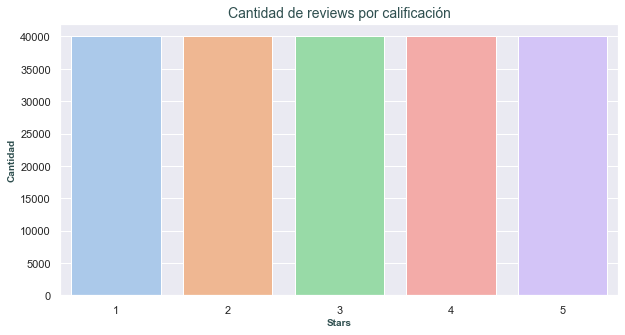

In [5]:
plt.figure(figsize = (10,5))
paleta = sns.color_palette("pastel")
sns.countplot(data = dataset, x = "stars", palette = paleta)
font = {'family': 'sans-serif',
        'color':  'darkslategray',
        'weight': 'bold',
        'size': 10,
        }
plt.xlabel('Stars', fontdict=font)
plt.ylabel('Cantidad',fontdict=font)
plt.title('Cantidad de reviews por calificación', fontdict=font, size = 14, weight = 'normal')
plt.show()


Efectivamente, el dataset está balanceado. Veamos cuál es su distribución según la categoría del producto comprado.

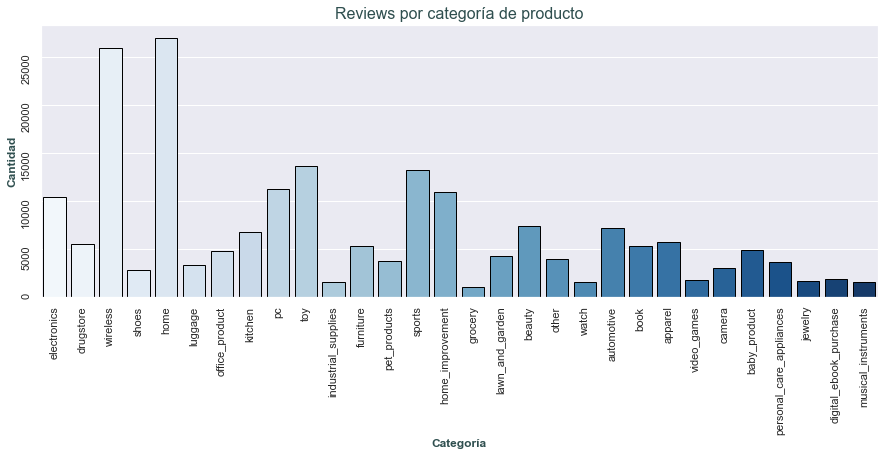

In [6]:
plt.figure(figsize = (15,5))

font = {'family': 'sans-serif',
        'color':  'darkslategray',
        'weight': 'bold',
        'size': 12,
        }
paleta = 'Blues'
sns.countplot(data = dataset, x = 'product_category',  orient = 'v', palette = paleta, edgecolor = (0,0,0))
plt.xlabel('Categoría', fontdict = font)
plt.ylabel('Cantidad', fontdict = font)
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.title('Reviews por categoría de producto', fontdict=font, size = 16, weight = 'normal')
plt.show()

**Verifico que todas las reviews del dataset estén clasificadas con el mismo lenguaje**

In [7]:
lenguajes = dataset.value_counts('language')
lenguajes


language
es    200000
dtype: int64

**Antes de continuar con al análisis exploratorio, es necesario efectuar algunas tareas de preprocesamiento**

Descarto los features prescindibles. Conservo la categoría del producto, en caso de que cobre relevancia en un análisis posterior.

In [8]:
dataset_train =pd.concat([dataset.review_body,dataset.stars, dataset.product_category],axis=1)
dataset_train.dropna(axis=0,inplace=True)  

# listo las reviews del nuevo dataset
reviews = [str(x) for x in dataset_train.review_body.values] 


**Normalización**

Defino una función que permita normalizar las reviews.

Las acciones que efectúa la función son las siguientes:

* Convierte las palabras a su lema
* Remueve símbolos de puntuación
* Remueve las palabras con menos de 4 caracteres
* Elimina stop-words
* Remueve caracteres que no son letras
* Remueve espacios dobles
* Conserva las palabras cuyo tipo es sustantivo, adjetivo, verbo o adverbio

In [9]:
import re
import spacy
from unicodedata import normalize as ucd
nlp = spacy.load('es_core_news_sm')
nlp.Defaults.stop_words.add('él')


def normalize(corpus):
    """normalizamos la lista de frases y devolvemos la misma lista de frases normalizada"""
    a,b = 'áéíóúüÁÉÍÓÚÜ','aeiouuAEIOUU'
    trans = str.maketrans(a,b)
    for index, doc in enumerate(corpus):
        doc = doc.translate(trans) # reemplazo letras acentuadas
        doc = nlp(doc.lower().replace('\\\\n','')) # convierto caracteres en minúsculas
        
        words_lemma = [word.lemma_ for word in doc if 
                                  (not word.is_punct) # remuevo símbolos de puntuación
                                  and (len(word.text) > 3) # remuevo palabras de longitud menor a 3
                                  and (not word.is_stop) # remuevo stopwords
                                  and re.sub('\S*@\S*\s?', '', word.text) # remuevo caracteres que no son letras
                                  and re.sub('\s+', ' ', word.text) # remuevo espacios dobles
                                  and (word.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV'])]
        
        corpus[index] = " ".join(words_lemma)
        
    return corpus


**Aplico la normalización en la lista de reviews del nuevo dataset**

In [10]:
# Normalizo las reviews
corpus_norm = normalize(reviews)

"""
Nota: Correr esta celda tomó aproximadamente 1 hora. 
Más adelante genero un csv con la info del dataset 
y un nuevo feature con esta review normalizada.
"""

'\nNota: Correr esta celda tomó aproximadamente 1 hora. \nMás adelante genero un csv con la info del dataset \ny un nuevo feature con esta review normalizada.\n'

***De la lematización surge que el pronombre él se convierte en la palabra más frecuente*** 

Esto ocurre porque determinadas conjugaciones de palabras lo incluyem dentro del lema.

Como en el siguiente ejemplo:


In [10]:
example = nlp('instalarlo')
example = [word.lemma_ for word in example]
example


['instalar él']

Esto es distorsivo para el análisis y decido excluir el pronombre "él" del corpus

In [42]:
corpus_norm = [w.replace('él', '') for w in corpus_norm]

['pantalla mes recibir respuesta fabricante', 'horrible tener comprar ingl informatico hora capaz instalar ', 'obligar comprar unidad llegar forma reclamar autentico estafa comprei', 'entro descalificar vendedor mes espera seguir producto tener contactar amazon reclamar reembolso amazon cargo problema desembolsar dinero mes devolver perdido palabra decidir', 'llegar talla equivocado', 'jama llegar vendedor contactar intentar ', 'paragua malo calidad sensacion romper abr cutre', 'tener devolver  triangular agarrar forma comodo escritura bonito calidad-precio aceptable funcional', 'esperar protestar solucion caso reembolso querer auricular', 'defectuoso apariencia producto tercer vaso mezclador grande dejar funcionar intentar pure requerir fuerza excesivo cuchilla dejar girar pena herramienta principio funcional barato salir caro mes vida decepcionado']
['pantalla mes recibir respuesta fabricante', 'horrible tener comprar ingl informatico hora capaz instalar ', 'obligar comprar unidad ll

***Ahora, genero un nuevo dataset que incluya la review, la clasificación en estrellas, la categoría del producto y la review lematizada***

In [43]:
dataset_train['review_lema'] = corpus_norm
dataset_train.head()

,review_body,stars,product_category,review_lema
0,Nada bueno se me fue ka pantalla en menos de 8...,1,electronics,pantalla mes recibir respuesta fabricante
1,"Horrible, nos tuvimos que comprar otro porque ...",1,electronics,horrible tener comprar ingl informatico hora c...
2,Te obligan a comprar dos unidades y te llega s...,1,drugstore,obligar comprar unidad llegar forma reclamar a...
3,"No entro en descalificar al vendedor, solo pue...",1,wireless,entro descalificar vendedor mes espera seguir ...
4,Llega tarde y co la talla equivocada,1,shoes,llegar talla equivocado


***Por el costo de procesamiento de la normalización de las reviews, decido generar un csv a partir del nuevo dataset. A partir de acá continúo trabajando con este csv.***

In [11]:
# genero csv con el dataset incluyendo las review lematizadas
dataset_train.to_csv(r'C:\Users\mdifo\Downloads\dataset_train_norm.csv', index = False)

***Y genero un nuevo dataset (normalizado) a partir del csv.***

In [13]:
# genero el nuevo dataset
dataset_train_norm = pd.read_csv('dataset_train_norm.csv', header = 0)
dataset_train_norm.head()

# elimino nulos (producto de que las lematizaciones pueden arrojar resultados vacíos)
dataset_train_norm = dataset_train_norm.dropna()    

Para continuar con el análisis exploratorio, genero subdatasets para cada clasificación de estrellas y estudio cómo se comporta cada uno.

In [14]:
# Genero un subdataset por cada clasificación de estrellas

dataset_stars_1 = dataset_train_norm[dataset_train_norm.stars==1]
dataset_stars_2 = dataset_train_norm[dataset_train_norm.stars==2]
dataset_stars_3 = dataset_train_norm[dataset_train_norm.stars==3]
dataset_stars_4 = dataset_train_norm[dataset_train_norm.stars==4]
dataset_stars_5 = dataset_train_norm[dataset_train_norm.stars==5]

In [15]:
# importo librerías
import nltk
import itertools

***Análisis reviews clasificadas con 1 estrella***

In [16]:
# listo las palabras de las reviews con 1 estrella
reviews_stars_1 = []
for i in range(dataset_stars_1.shape[0]):
    review = dataset_stars_1.iloc[i].review_lema
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    #review = [word for word in review if word != 'él']
    reviews_stars_1.append(review)
    
reviews_stars_1 = list(itertools.chain(*reviews_stars_1))
reviews_stars_1[0:10]

['pantalla',
 'mes',
 'recibir',
 'respuesta',
 'fabricante',
 'horrible',
 'tener',
 'comprar',
 'ingl',
 'informatico']

***Distribución de palabras según su frecuencia (1 estrella)***

In [17]:
# estudio la frecuencia de las palabras 
freq_stars_1 = nltk.FreqDist(reviews_stars_1)
df_stars_1 = pd.DataFrame(list(freq_stars_1.items()), columns = ["Word","Frequency"])
df_stars_1.sort_values('Frequency',ascending=False, inplace = True)
df_stars_1.reset_index(drop = True, inplace=True)
df_stars_1.head()

,Word,Frequency
0,llegar,7955
1,producto,7662
2,funcionar,5304
3,comprar,4788
4,calidad,4345


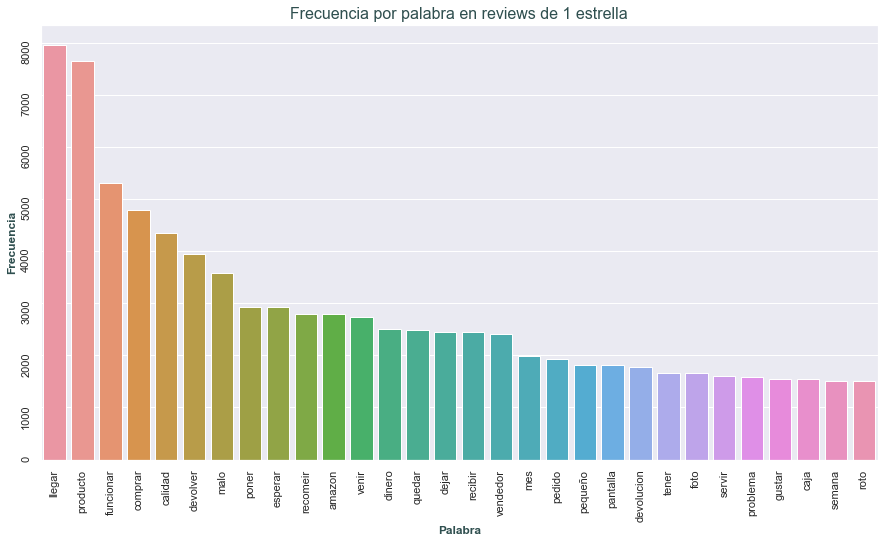

In [18]:
# grafico las palabras ordenadas según la frecuencia con que aparecen
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_stars_1.iloc[:30].Word, y = df_stars_1.iloc[:30].Frequency)
plt.xlabel('Palabra', fontdict = font)
plt.ylabel('Frecuencia', fontdict = font)
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.title('Frecuencia por palabra en reviews de 1 estrella', fontdict=font, size = 16, weight = 'normal')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

***Análisis reviews clasificadas con 2 estrellas***

In [19]:
# listo las palabras de las reviews con 2 estrellas
reviews_stars_2 = []
for i in range(dataset_stars_2.shape[0]):
    review = dataset_stars_2.iloc[i].review_lema
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [word for word in review]
    reviews_stars_2.append(review)
    
reviews_stars_2 = list(itertools.chain(*reviews_stars_2))
reviews_stars_2[0:10]

['tornillo',
 'ajustar',
 'caer',
 'volveriar',
 'comprar',
 'impresión',
 'seguido',
 'aparecer',
 'borroso',
 'zona']

***Distribución de palabras según su frecuencia (2 estrellas)***

In [20]:
# estudio la frecuencia de las palabras 
freq_stars_2 = nltk.FreqDist(reviews_stars_2)
df_stars_2 = pd.DataFrame(list(freq_stars_2.items()), columns = ["Word","Frequency"])
df_stars_2.sort_values('Frequency',ascending=False, inplace = True)
df_stars_2.reset_index(drop = True, inplace=True)
df_stars_2.head()

,Word,Frequency
0,calidad,5894
1,producto,4946
2,comprar,4296
3,funcionar,4113
4,quedar,3837


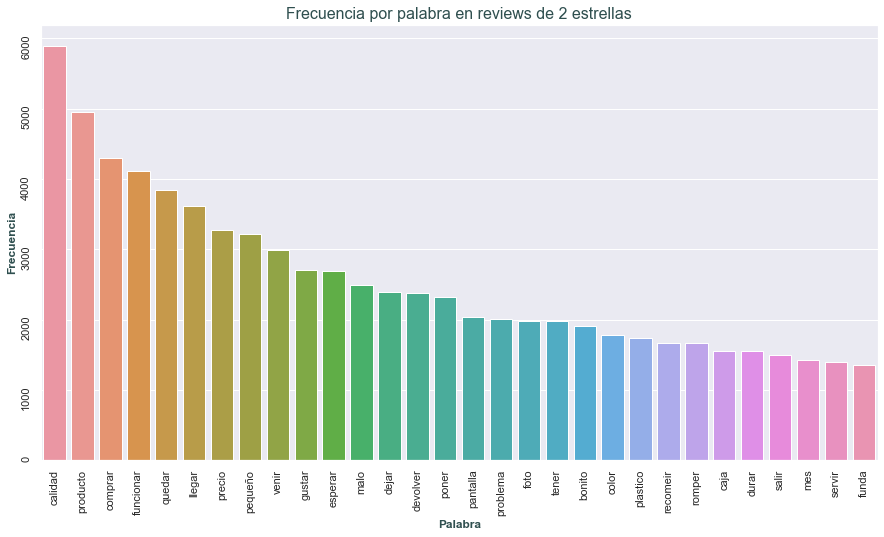

In [21]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_stars_2.iloc[:30].Word, y = df_stars_2.iloc[:30].Frequency)
plt.xlabel('Palabra', fontdict = font)
plt.ylabel('Frecuencia', fontdict = font)
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.title('Frecuencia por palabra en reviews de 2 estrellas', fontdict=font, size = 16, weight = 'normal')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

***Análisis reviews clasificadas con 3 estrellas***

In [22]:
# listo las palabras de las reviews con 3 estrellas
reviews_stars_3 = []
for i in range(dataset_stars_3.shape[0]):
    review = dataset_stars_3.iloc[i].review_lema
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [word for word in review]
    reviews_stars_3.append(review)
    
reviews_stars_3 = list(itertools.chain(*reviews_stars_3))
reviews_stars_3[0:10]

['caber',
 'movil',
 'cumplir',
 'funcion',
 'hecho',
 'pequeño',
 'espacio',
 'guardar',
 'tarjeta',
 'efectivo']

***Distribución de palabras según su frecuencia (3 estrellas)***

In [23]:
# estudio la frecuencia de las palabras 
freq_stars_3 = nltk.FreqDist(reviews_stars_3)
df_stars_3 = pd.DataFrame(list(freq_stars_3.items()), columns = ["Word","Frequency"])
df_stars_3.sort_values('Frequency',ascending=False, inplace = True)
df_stars_3.reset_index(drop = True, inplace=True)
df_stars_3.head()

,Word,Frequency
0,calidad,5973
1,precio,5395
2,producto,4214
3,pequeño,3562
4,quedar,3505


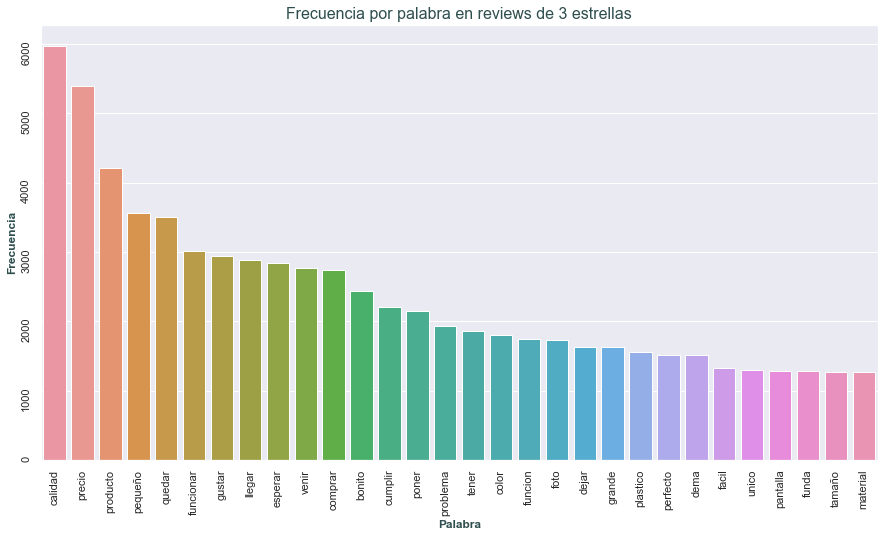

In [24]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_stars_3.iloc[:30].Word, y = df_stars_3.iloc[:30].Frequency)
plt.xlabel('Palabra', fontdict = font)
plt.ylabel('Frecuencia', fontdict = font)
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.title('Frecuencia por palabra en reviews de 3 estrellas', fontdict=font, size = 16, weight = 'normal')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

***Análisis reviews clasificadas con 4 estrellas***

In [25]:
# listo las palabras de las reviews con 4 estrellas
reviews_stars_4 = []
for i in range(dataset_stars_4.shape[0]):
    review = dataset_stars_4.iloc[i].review_lema
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [word for word in review]
    reviews_stars_4.append(review)
    
reviews_stars_4 = list(itertools.chain(*reviews_stars_4))
reviews_stars_4[0:10]

['pinta',
 'ver',
 'resultado',
 'entrega',
 'rapido',
 'faltar',
 'factura',
 'envio',
 'rapido',
 'quedar']

***Distribución de palabras según su frecuencia (4 estrellas)***

In [26]:
# estudio la frecuencia de las palabras 
freq_stars_4 = nltk.FreqDist(reviews_stars_4)
df_stars_4 = pd.DataFrame(list(freq_stars_4.items()), columns = ["Word","Frequency"])
df_stars_4.sort_values('Frequency',ascending=False, inplace = True)
df_stars_4.reset_index(drop = True, inplace=True)
df_stars_4.head()

,Word,Frequency
0,calidad,7455
1,precio,7045
2,producto,4526
3,perfecto,3679
4,cumplir,3320


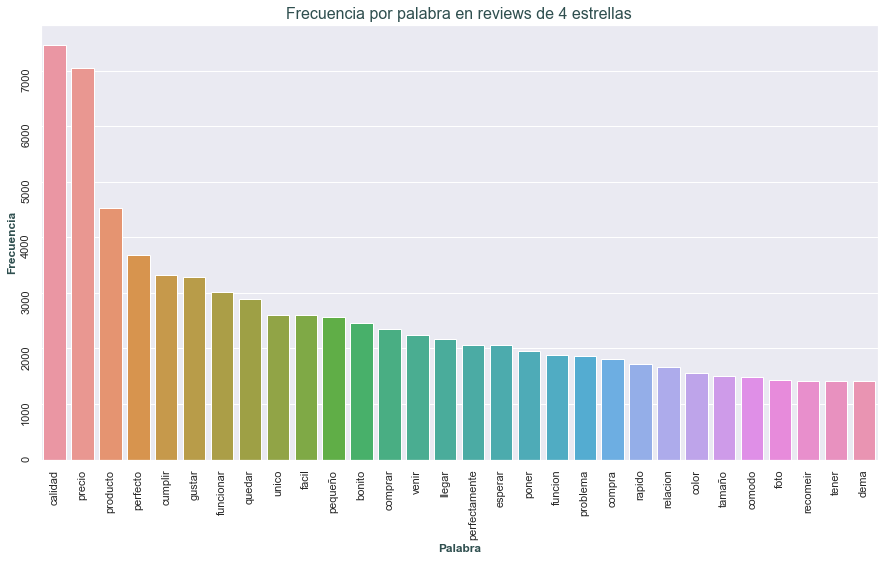

In [27]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_stars_4.iloc[:30].Word, y = df_stars_4.iloc[:30].Frequency)
plt.xlabel('Palabra', fontdict = font)
plt.ylabel('Frecuencia', fontdict = font)
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.title('Frecuencia por palabra en reviews de 4 estrellas', fontdict=font, size = 16, weight = 'normal')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

***Análisis reviews clasificadas con 5 estrellas***

In [28]:
# listo las palabras de las reviews con 5 estrellas
reviews_stars_5 = []
for i in range(dataset_stars_5.shape[0]):
    review = dataset_stars_5.iloc[i].review_lema
    review = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review = [word for word in review]
    reviews_stars_5.append(review)
    
reviews_stars_5 = list(itertools.chain(*reviews_stars_5))
reviews_stars_5[0:10]

['practico',
 'vacación',
 'preocupar',
 'seguirar',
 'vivo',
 'planta',
 'volver',
 'montaje',
 'sencillo',
 'regular']

***Distribución de palabras según su frecuencia (5 estrellas)***

In [29]:
# estudio la frecuencia de las palabras 
freq_stars_5 = nltk.FreqDist(reviews_stars_5)
df_stars_5 = pd.DataFrame(list(freq_stars_5.items()), columns = ["Word","Frequency"])
df_stars_5.sort_values('Frequency',ascending=False, inplace = True)
df_stars_5.reset_index(drop = True, inplace=True)
df_stars_5.head()

,Word,Frequency
0,calidad,8240
1,perfecto,6916
2,precio,5809
3,producto,4692
4,comprar,3316


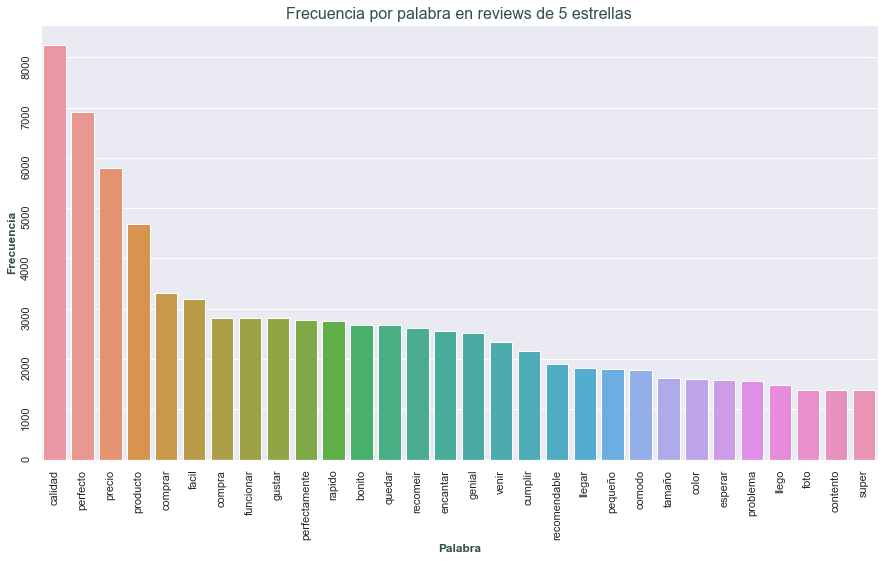

In [30]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_stars_5.iloc[:30].Word, y = df_stars_5.iloc[:30].Frequency)
plt.xlabel('Palabra', fontdict = font)
plt.ylabel('Frecuencia', fontdict = font)
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.title('Frecuencia por palabra en reviews de 5 estrellas', fontdict=font, size = 16, weight = 'normal')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

***Poniendo todo junto***

Comparo las palabras más utilizadas según la clasificación otorgada.

In [31]:
# Create and generate a word cloud image:
from wordcloud import WordCloud 
from collections import Counter 
 
count_stars_1 = Counter(reviews_stars_1)
count_stars_2 = Counter(reviews_stars_2)
count_stars_3 = Counter(reviews_stars_3)
count_stars_4 = Counter(reviews_stars_4)
count_stars_5 = Counter(reviews_stars_5)

common_words_1 = [word[0] for word in count_stars_1.most_common(50)]
common_counts_1 = [word[1] for word in count_stars_1.most_common(50)]
common_words_2 = [word[0] for word in count_stars_2.most_common(50)]
common_counts_2 = [word[1] for word in count_stars_2.most_common(50)]
common_words_3 = [word[0] for word in count_stars_3.most_common(50)]
common_counts_3 = [word[1] for word in count_stars_3.most_common(50)]
common_words_4 = [word[0] for word in count_stars_4.most_common(50)]
common_counts_4 = [word[1] for word in count_stars_4.most_common(50)]                   
common_words_5 = [word[0] for word in count_stars_5.most_common(50)]
common_counts_5 = [word[1] for word in count_stars_5.most_common(50)]
 

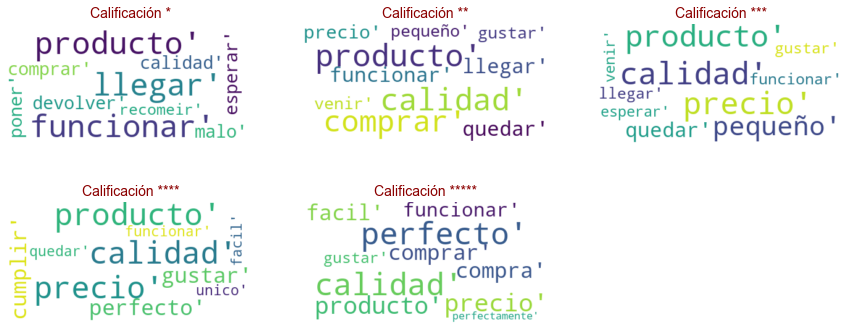

In [32]:
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 10,
        }

plt.figure(figsize = (15,6))

paleta_propiedades = sns.color_palette("pastel")
plt.subplot(2,3,1)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(str(common_words_1))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Calificación *', fontdict=font, size = 14, weight = 'normal')


plt.subplot(2,3,2)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(str(common_words_2))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Calificación **', fontdict=font, size = 14, weight = 'normal')

plt.subplot(2,3,3)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(str(common_words_3))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Calificación ***', fontdict=font, size = 14, weight = 'normal')

plt.subplot(2,3,4)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(str(common_words_4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Calificación ****', fontdict=font, size = 14, weight = 'normal')

plt.subplot(2,3,5)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(str(common_words_5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Calificación *****', fontdict=font, size = 14, weight = 'normal')
plt.show()

Las palabras van cambiando gradualmente a medida que se van incrementando la cantidad de estrellas otorgadas.

Entre la calificación de 1 estrella y de 5 estrellas este cambio es más notorio que entre las calificaciones lindantes.

La palabra calidad, con diferente tamaño (distinta frecuencia) aparece en todos los casos.

***Pregunta: ¿La distribución de calificaciones es igual para todas las categorías de productos o hay algunos mejor valorados?***

Veámoslo gráficamente

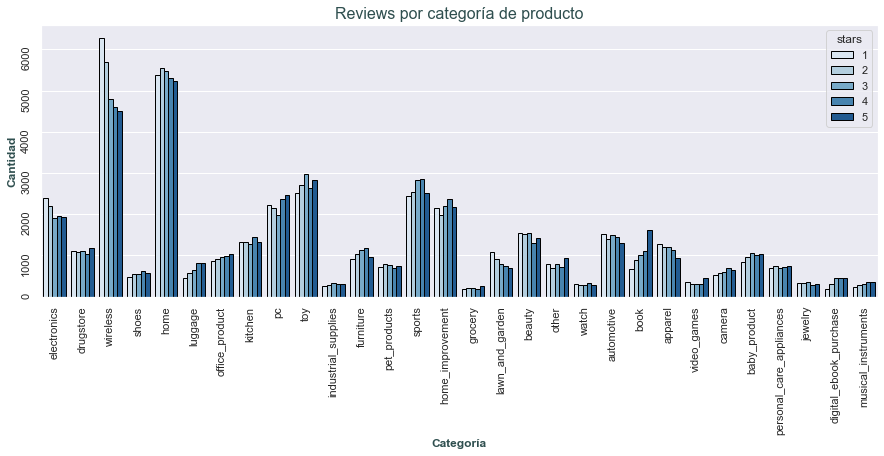

In [44]:
plt.figure(figsize = (15,5))

font = {'family': 'sans-serif',
        'color':  'darkslategray',
        'weight': 'bold',
        'size': 12,
        }
paleta = 'Blues'
sns.countplot(data = dataset, x = 'product_category',  orient = 'v', palette = paleta, edgecolor = (0,0,0), hue = dataset.stars)
plt.xlabel('Categoría', fontdict = font)
plt.ylabel('Cantidad', fontdict = font)
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.title('Reviews por categoría de producto', fontdict=font, size = 16, weight = 'normal')
plt.show()

Mirando el gráfico se infiere a simple vista que hay categorías mejor valoradas que otras.

La relación entre calificaciones positivas y negativas es inversa para las categorías *wireless* y *book*, teniendo la segunda una valoración mucho más positiva.


---

#### Parte B - Modelo de Machine Learning

<br /> 

***Genero los vectores que le permitirán al modelo predecir la cantidad de estrellas que recibió una review***

In [45]:
# tomo la lista de palabras y el vector que indica la calificación que recibió el producto
list_reviews = list(dataset_train_norm['review_lema'].values)
stars = dataset_train_norm['stars'].values


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Uso solo las 100 palabras con más frecuencia en todo el corpus para generar los vetores
max_features=100

# Cada instancia entonces tendra 100 features
cou_vec=CountVectorizer(max_features=max_features) 


In [47]:
# genero los vectores para cada review
matriz_reviews = cou_vec.fit_transform(list_reviews)

matriz_reviews.shape


(199784, 100)

Primero defino las variables predictoras (los vectores generados a partir de las palabras más utilizadas) y la variable objetivo (la cantidad de estrellas otorgadas)

In [48]:
x = matriz_reviews.toarray()
y = stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Defino una función que me permitirá evaluar los modelos obtenidos a través de una matriz de confusión.

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["1","2","3","4","5"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

***Modelo benchamark***

En primer lugar defino un modelo simple que me servirá de modelo benchmark para testear el modelo escogido.

Como modelo benchmark entonces elegiré un clasificador bayesiano ingenuo.

*Accuracy* es la medida que utilizaré para comparar el rendimiento de los diferentes modelos: (TP + TN) / (TP + TN + FP + FN), teniendo en cuenta que el accuracy de un modelo que selecciona al azar es del 20%.

In [50]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("La precisión del modelo Naive Bayes es de: ", nb.score(xtest,ytest))

La precisión del modelo Naive Bayes es de:  0.35310458743148887


Veamos cómo se comporta su matriz de confusión

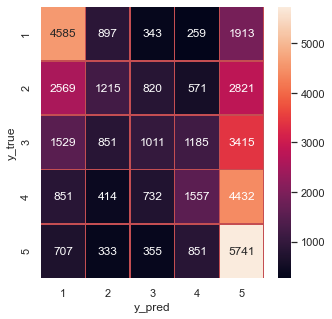

In [51]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

***Modelo Random forest classifier***

Pruebo un modelo random forest classifeir con sus parámteros por defautl.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("La precisión del modelo RandomForestClassifier con parámteros por default es de: ",rf.score(xtest,ytest))

La precisión del modelo RandomForestClassifier con parámteros por default es de:  0.3591360712766224


Veamos su matriz de confusión

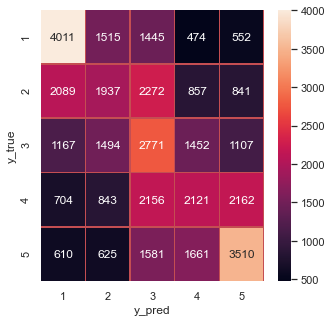

In [53]:
y_pred = rf.predict(xtest)
confusion(ytest,y_pred)

El modelo mejora ligeramente respecto del benchmark. 

***Optimización del modelo escogido***

Defino las opciones que se utilizarán en el random grid que optimizará los parámetros del modelo.

In [54]:
# Número de árboles (default 100)
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)] 
# Número de atributos en cada division (default auto)
max_features = ['auto', 'sqrt']  #default auto
# Máxima profundidad (default none)
max_depth = [int(x) for x in np.linspace(2, 50, num = 25)] 
max_depth.append(None)   
# Mínimo número de muestras para dividir un nodo (default 2)
min_samples_split = [2, 5, 10] 
# Mínimo número de muestras requeridas para estar en un hoja (default 1)
min_samples_leaf = [1, 2, 4] 
# Método de selección de muestras para entrenar cada árbol (default=True)
bootstrap = [True, False] # default=True


# Creo el random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }



Utilizo un Randomized Search para obtener los parámetros que optimizan el modelo

In [37]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=10, random_state=42, n_jobs = -1)
rf_random.fit(xtrain, ytrain)

print("Mejores parametros: "+str(rf_random.best_params_))
print("Mejor Score: "+str(rf_random.best_score_)+'\n')


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 37.9min finished


Mejores parametros: {'n_estimators': 130, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
Mejor Score: 0.3832331072186035



Vuelvo a correr el modelo con los mejores parámetros obtenidos.

In [55]:
rf_best_params = RandomForestClassifier(n_estimators = 130, min_samples_split = 5, min_samples_leaf = 4, 
                                         max_features = 'auto', max_depth = 50, bootstrap = True, random_state=42)
rf_best_params.fit(xtrain,ytrain)
print("La precisión del modelo RandomForestClassifier con parámteros optimizados es de: ",rf_best_params.score(xtest,ytest))

La precisión del modelo RandomForestClassifier con parámteros optimizados es de:  0.3878419300748304


***Verifico cómo se comporta su matriz de confusión***

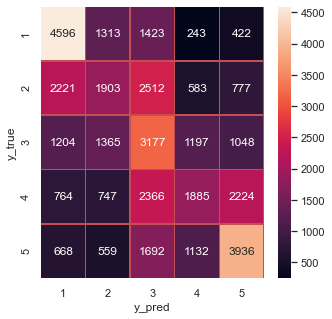

In [56]:
y_pred = rf_best_params.predict(xtest)
confusion(ytest,y_pred)

El modelo mejora pero no lo suficiente.

---

#### Parte C - Investigación

<br /> 


El modelo obtenido parece moverse mejor en los extremos. Obtiene mejores resultados cuando debe clasificar reviews de 1 y 5 estrellas que en las categorías intermedias.

Por capacidad de procesamiento de mi computadora, definí un *max_features* de 100 para el *CountVectorizer* y los parámetros del *RandomizedSearch* también fueron austeros (*estimators* máximo 200, *CV* = 3)

Aún así, las matrices de confusión obtenidas sugieren que agrupando en categorías más amplias ("calificaciones positivas","calificaciones negativas") el accuracy obtenido mejoraría sensiblemente. A costa de perder la capacidad de predecir una calificación específica.

Veamos cuál es el peso de cada feature en el resultado obtenido.

C:\Users\mdifo\Miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


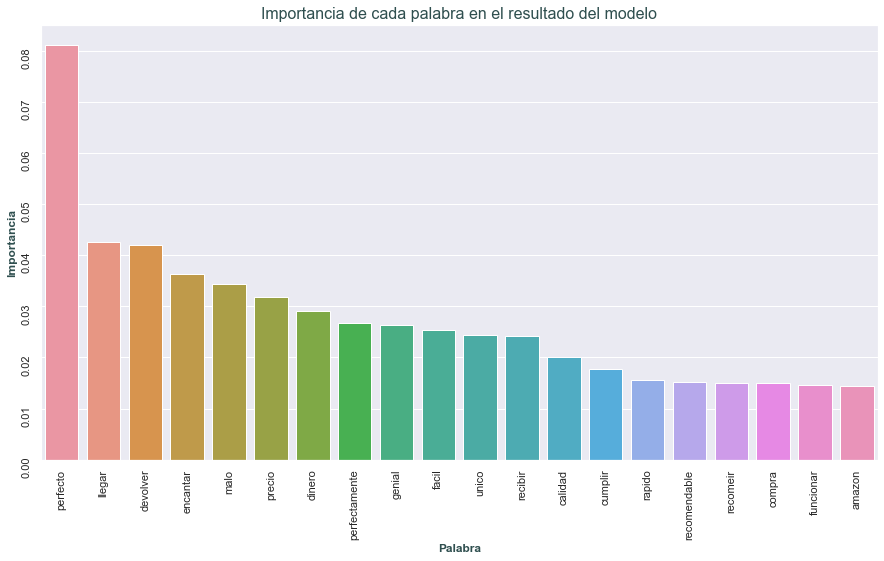

In [57]:
# Estudio la importancia de cada feature en el resultado obtenido
importances = rf_best_params.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordeno por importancia y tomo las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Grafico
plt.figure(figsize = (15,8))
plot = sns.barplot(selected_columns, selected_importances)
plt.xlabel('Palabra', fontdict = font)
plt.ylabel('Importancia', fontdict = font)
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.title('Importancia de cada palabra en el resultado del modelo', fontdict=font, size = 16, weight = 'normal')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()


Para optimizar este modelo, me gustaría probar que el modelo mejoraría sensiblemente si la predicción no fuera tan específica y apuntara a predecir entre 2 categorías más amplias.

Aunque habría que rediseñar  el modelo para verificarlo, una prueba rápida de que así sería queda en evidencia al analizar la matriz de confusión obtenida.

Revisitemos la matriz de confusión obtenida para el modelo escogido.

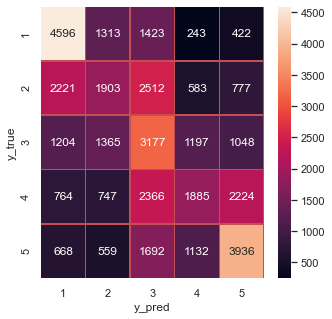

In [58]:
confusion(ytest,y_pred)

Ahora supongamos, un modelo que sólo presenta 2 clasificaciones:

+ Positivo
+ Negativo

Siempre teniendo en cuenta que estas conclusiones no pueden extrapolarse linealmente y que es necesario correr un nuevo modelo con un dataset balanceado y una nueva vectorización, a grandes rasgos es fácil verificar que el modelo actual confunde entre 1 y 2 estrellas, y 3, 4 y 5 estrellas más que entre 1 y 5 estrellas. 

Con los riesgos que implica asumir esto, la matriz de confusión ajustada sería la siguiente:

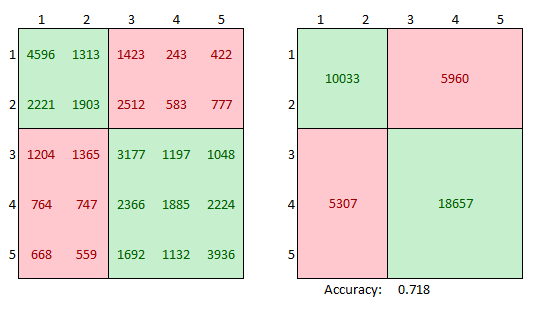

***Una optimización posible entonces sería definir 2 tipos de calificaciones y definir un modelo que prediga en consecuencia.***

Los pasos para alcanzar este objetivo serían los siguietnes:

- Partiendo del dataset ya depurado (normalizado y lematizado), habría que mapear las calificaciones agrupándolas en 2 categorías (positivas / negativas)
- Luego, generar nuevos vectores utilizando estas nuevas categorías.
- Dividir el nuevo dataset en train y test. Independientemente de dónde hagamos el corte, convertir 5 categorías en 2 producirá un desbalance que antes no teníamos entre clasificaciones positivas y negativas (seguramente 40%/60%, dependiendo de la decisión que se tome). Cobrará más importancia que la división entre train y test se encuentre estratificada según esta nueva clasificación.
- Una vez obtenidos los datos de train, será necesario correr un nuevo modelo benchmark que prediga qué tipo de calificación recibió cada *review*. Puede ser un modelo que aleatoriamente decida si la calificación es negativa o positiva (teniendo en cuenta que las probabilidades tambíen tendrán que estar ajustadas 40%/60%) o volver a utilizar, como en este proyecto un modelo simple.
- Por útlimo, resta correr un nuevo modelo. Podemos repetir un modelo basado en el algoritmo Random Forest Classifier o buscar qué algoritmo se adapta mejor ahora que convertimos el problema en una clasificaicón binaria.
- En cualquier caso, habrá que trabajar en encontrar los mejores parámetros e hiperparámetros que optimicen su rendimiento.
- Finalmente, analizar si los resultados obtenidos (tomando como referencia la métrica seleccionada, *accuracy*). coinciden con los esperados expuestos anteriormente: que, a costa de perder la capacidad de predecir especificamente cuántas estrellas recibió una calificación, mejora sensiblemente la capacidad del modelo de predecir si la calificación fue positiva o negativa.